# Iris Classification
    1. There are 3 categories
        - Irirs Versicolor
        - Irirs Setosa
        - Irirs Verginica
    2. Distinguished by :
        - Sepal Length
        - Sepal Width
        - Petal Length 
        - Petal Width

# Loading imports

In [1]:
#EDA imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Plots to appear in notebook
%matplotlib inline


from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
iris = pd.read_csv("iris.csv")
iris.shape
iris = iris.drop('Unnamed: 0', axis=1) 

In [3]:
#Description of the Dataset
print(iris.isna().sum())
print(iris.describe())

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64
       Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [4]:
# Number of each species in the dataset.
n = len(iris[iris['Species'] == 'versicolor'])
print("No of Versicolor in Dataset:",n)
n1 = len(iris[iris['Species'] == 'virginica'])
print("No of Virginica in Dataset:",n1)
n2 = len(iris[iris['Species'] == 'setosa'])
print("No of Setosa in Dataset:",n2)

No of Versicolor in Dataset: 50
No of Virginica in Dataset: 50
No of Setosa in Dataset: 50


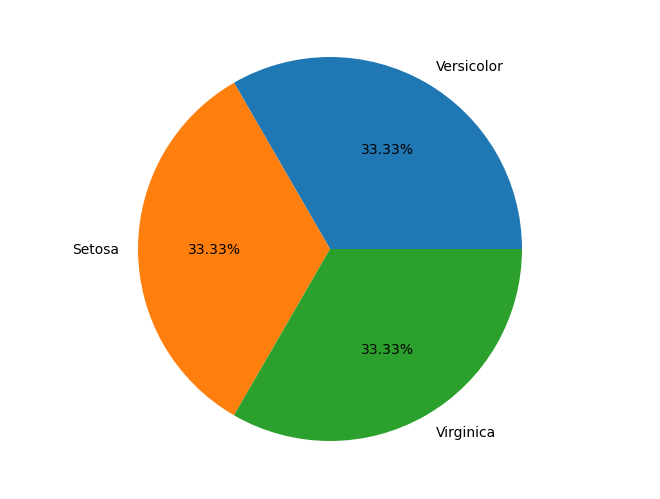

In [5]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

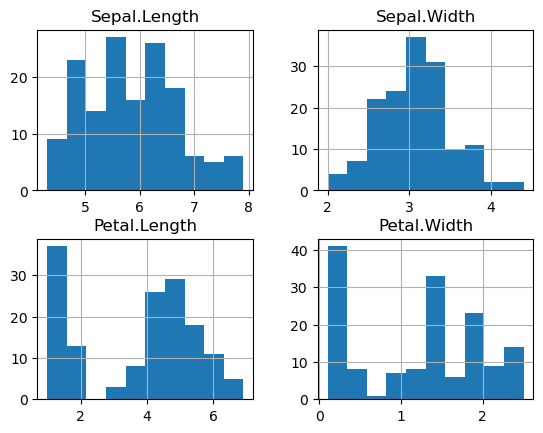

In [6]:
# Plotting histigram for more analysis
iris.hist()
plt.show()

In [23]:
# Importing models
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [14]:
#Table
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Train Test split.

In [41]:
# Everything except target variable
X = iris.drop("Species", axis=1)

# Target variable
y = iris.target.values

(120, 5)
(30, 5)


In [50]:
train_X = train[['Sepal.Length', 'Sepal.Width', 'Petal.Length',
                 'Petal.Width']]
train_y = train.Species

test_X = test[['Sepal.Length', 'Sepal.Width', 'Petal.Length',
                 'Petal.Width']]
test_y = test.Species


# Trying Multiple Models to find the best accuracy

In [59]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
          "Support Vector": SVC(),
          "Gaussian": GaussianNB(),
          "Decision Tree": DecisionTreeClassifier(criterion='entropy',random_state=7)}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores


In [60]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 1.0,
 'Logistic Regression': 1.0,
 'Random Forest': 1.0,
 'Support Vector': 1.0,
 'Gaussian': 1.0,
 'Decision Tree': 1.0}

# Predicting test and train

In [65]:
# Prdicting
X_train_prediction = model.predict(X_train)
# compring the predictions w/ the Y-train data
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print("Accuracy score of Training Data :",training_data_accuracy)

Accuracy score of Training Data : 0.9833333333333333


In [66]:
X_test_prediction = model.predict(X_test)
# comparing the predictions w/ the Y-test data
test_data_accuracy = accuracy_score(X_test_prediction,y_test)
print("Accuracy score of Test Data :",test_data_accuracy)

Accuracy score of Test Data : 1.0


In [67]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# As all accuracy are same we prefer Logistic Regression

In [73]:
input_data = ([5.1,3.5,1.4,0.2])

# changing the input_data to numpy array
input_nparray = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_nparray_reshaped = input_nparray.reshape(1,-1)
prediction = model.predict(input_nparray_reshaped)
print("Prediction:{}".format(prediction));


Prediction:['setosa']
